# Principal Component Analysis (PCA)

###  주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술

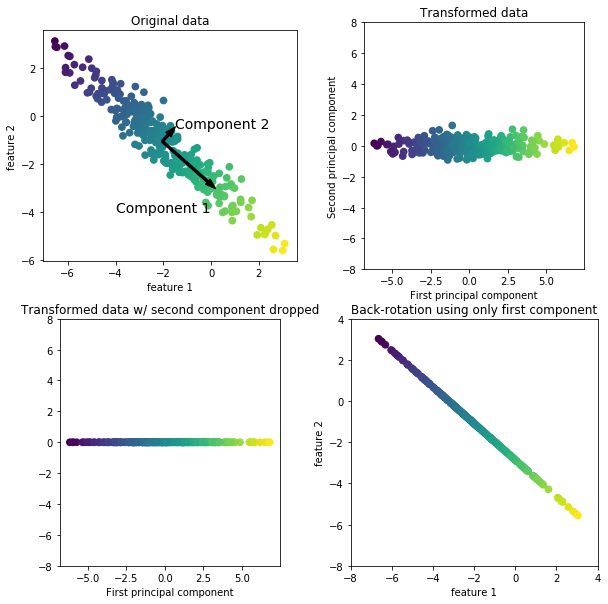

In [1]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mglearn.plots.plot_pca_illustration()

## PCA 적용하여 유방암 데이터셋 시각화하기

In [2]:
# Load breast_cancer
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [3]:
malignant = cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

print(malignant.shape)
print(benign.shape)

(212, 30)
(357, 30)


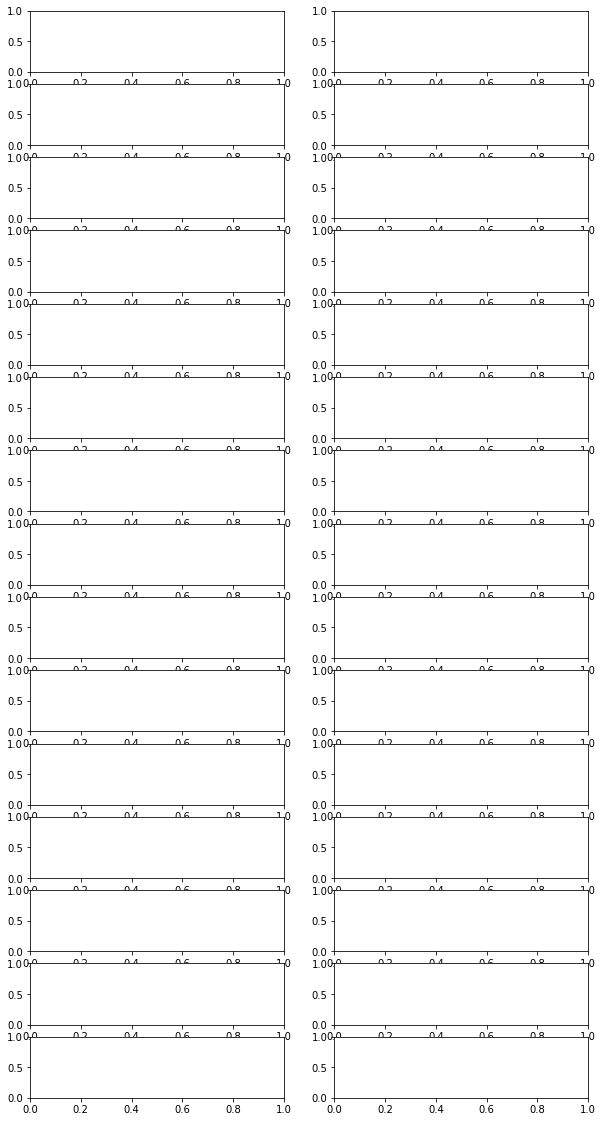

In [4]:
fig,axes=plt.subplots(15,2,figsize=(10,20))
ax=axes.ravel() # np.ravel returns a flattened array.

## eigenface

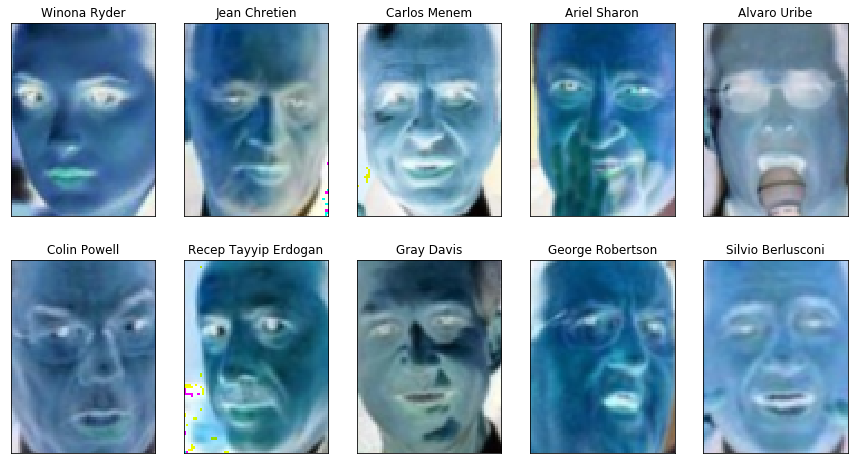

In [5]:
from __future__ import print_function
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20, resize=0.7, color=True)

image_shape=people.images[0].shape
fig, axes=plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks': (), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [6]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65, 3)
클래스 개수: 62


In [7]:
counts=np.bincount(people.target) # 각 타깃이 나타난 횟수 계산
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ') # end가 없으면 엔터로 됨
    if (i+1)%3==0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [8]:
mask=np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1

X_people=people.data[mask]
y_people=people.target[mask]

In [9]:
X_people=X_people/255.

In [10]:
# 1. K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn_1=KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn_1.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.24


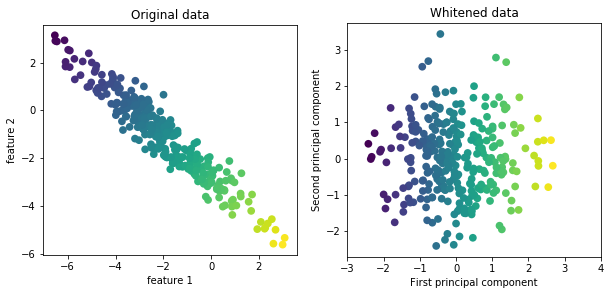

In [11]:
mglearn.plots.plot_pca_whitening()

In [12]:
from sklearn.decomposition import PCA

pca=PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [13]:
knn_2=KNeighborsClassifier(n_neighbors=1)
knn_2.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn_2.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


In [14]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 16965)


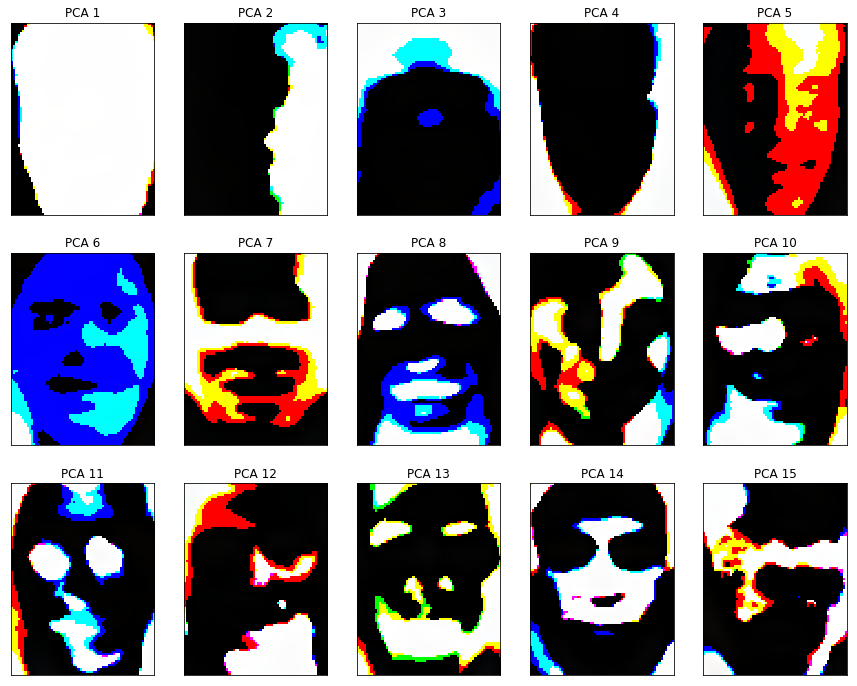

In [15]:
# 여기서 matplotlib version에 따라 다음과 같은 에러가 발생할 수 있다.
# Floating point image RGB values must be in the 0..1 range
# Solution: pip install matplotlib==2.0.2 

fig, axes=plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("PCA {}".format((i+1)))

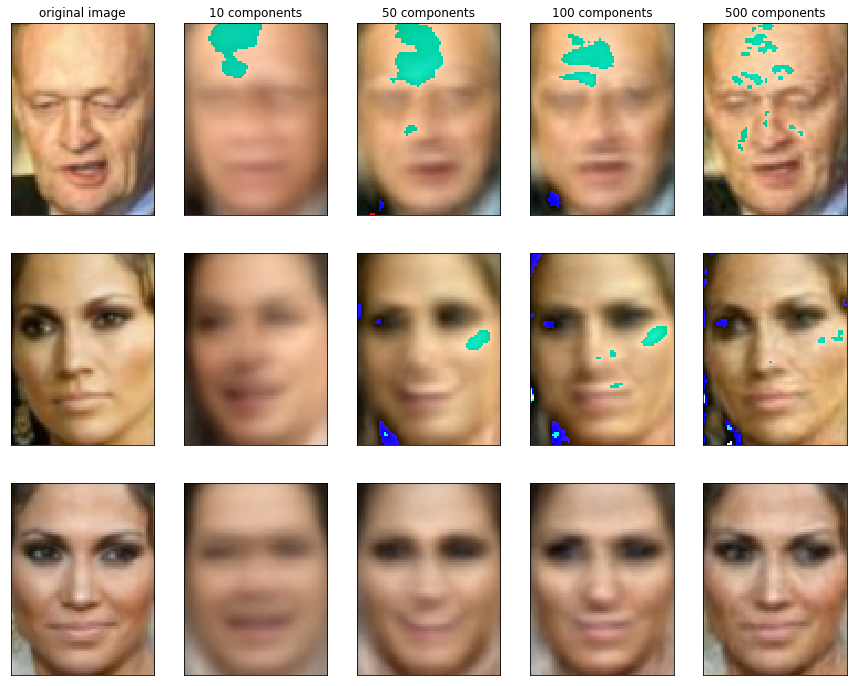

In [16]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

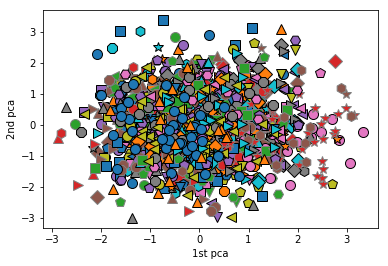

In [17]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("1st pca")
plt.ylabel("2nd pca")

## NMF

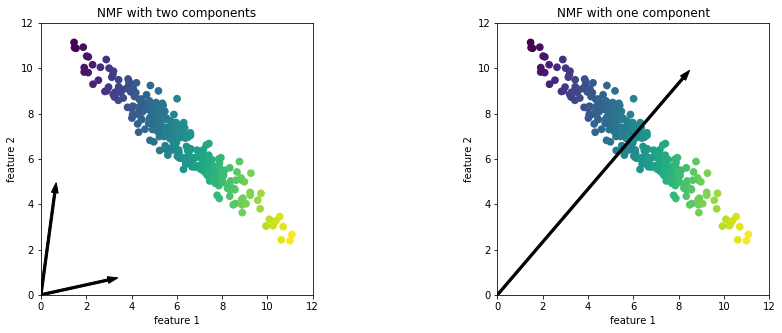

In [18]:
mglearn.plots.plot_nmf_illustration()

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.584314, ..., 0.168627],
       ...,
       [0.039216, ..., 0.494118]], dtype=float32), 
array([[0.333333, ..., 0.301961],
       ...,
       [0.396078, ..., 0.152941]], dtype=float32))
____________________________________________________nmf_faces - 1313.7s, 21.9min


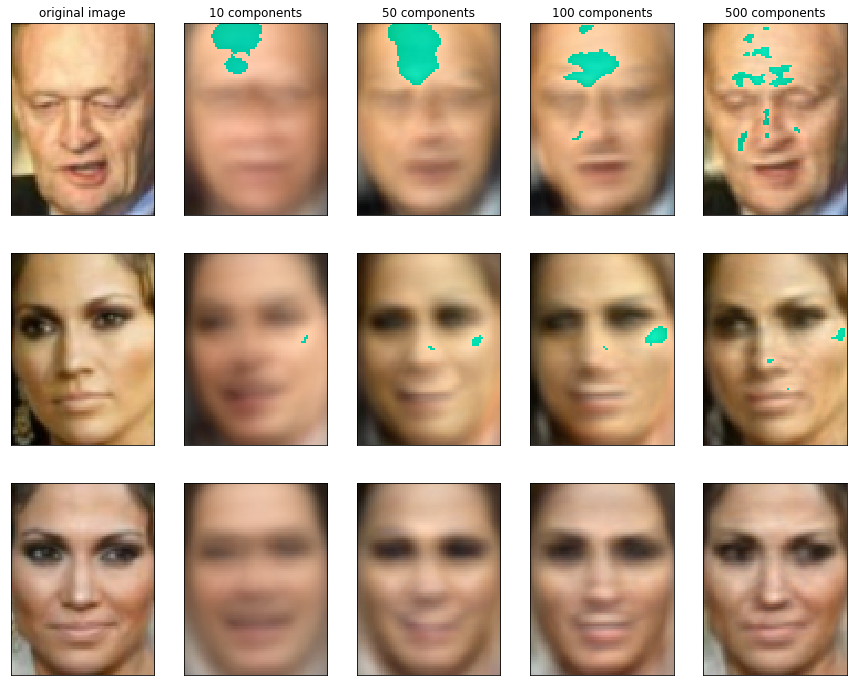

In [19]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

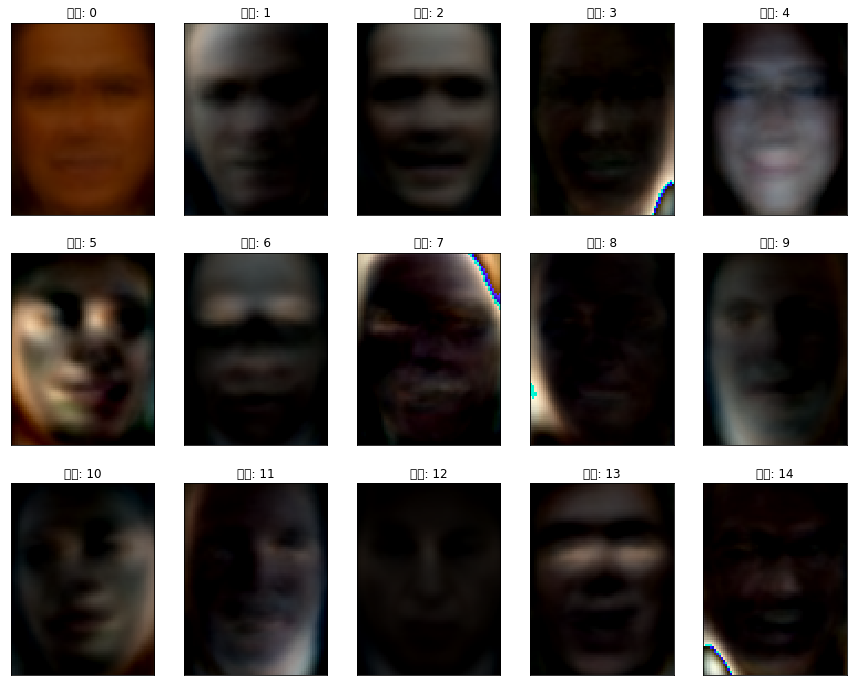

In [20]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)

fig, axes=plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분: {}".format(i))